# Example 1: Forward modeling of RT models (**surface part**)

## 1. Narrative (Examples of forward modeling of available RT models (surface part))

This notebook demonstrates the different available RT models (surface part) and highlights the nessesary input parameters. A short overview of the required input parameters can be found [here](https://sense-community-sar-scattering-model.readthedocs.io/en/dev/03_Usage.html#required-input-paramter).

Available RT models
1. **WaterCloud**
2. **Oh92**
3. **Oh04**
4. **Dubois95**
5. **I2EM** - not working right now

## 2. Requirements

- Installation of SenSE

## 3. Required imports and helper function

In [1]:
# import packages
#-----------------
import numpy as np
import matplotlib.pyplot as plt
from sense.surface import Oh92, Oh04, Dubois95, WaterCloudSurface, I2EM
from sense.util import f2lam
from sense.dielectric import Dobson85

In [2]:
# Helper function
#------------------
# The RT model output is backscatter in linear units.
# For visualization in a later stage the backscatter is usually displayed in 
# decibel (dB).  
def db(x):
    return 10.*np.log10(x)

## 4. Nessesary input parameters

In [ ]:
# Needed by all RT-models
mv = np.linspace(0.01,0.4) # soil moisture [m³/m³]
theta = np.deg2rad(40) # incidence angle [radians]

# Nessesary parameters for all except WaterCloudSurface
f  = 5.3 # Frequency [GHz]
s = 0.3/100. # surface roughness [m]

# Calculations
lam = f2lam(f)  # wavelength [m]
k = 2.*np.pi/lam # radar wave number
ks = k * s 

## 5. Available RT models

### 5.1 WaterCloudSurface

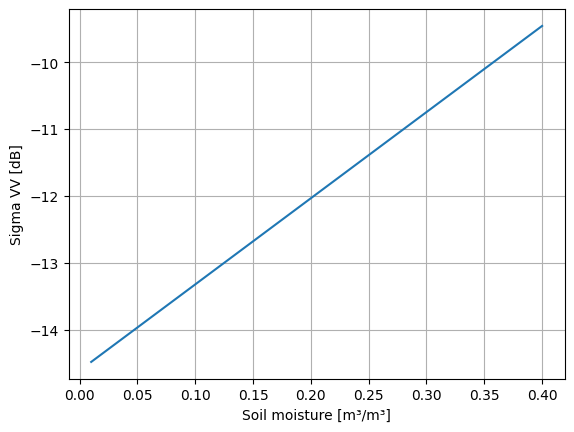

In [4]:
# Nessesary input parameters specific to Water Cloud (other parameters are
# already defined under 4. Nessesary input parameters by all RT-models)
C_vv = -14.61 # empirical factor need to calibrated for each test site
D_vv = 12.88 # empirical factor need to calibrated for each test site
C_hh = 0 # empirical factor need to calibrated for each test site
D_hh = 0 # empirical factor need to calibrated for each test site
C_hv = 0 # empirical factor need to calibrated for each test site
D_hv = 0 # empirical factor need to calibrated for each test site

# Run RT model Water Cloud (surface part)
water_cloud_surface = WaterCloudSurface(mv=mv,C_vv=C_vv,D_vv=D_vv,C_hh=C_hh,D_hh=D_hh,C_hv=C_hv,D_hv=D_hv,theta=theta)

# Plot calculated backscatter
plt.plot(mv, db(water_cloud_surface.vv))
plt.xlabel('Soil moisture [m³/m³]')
plt.ylabel('Sigma VV [dB]')
plt.grid()


### 5.2 Oh92

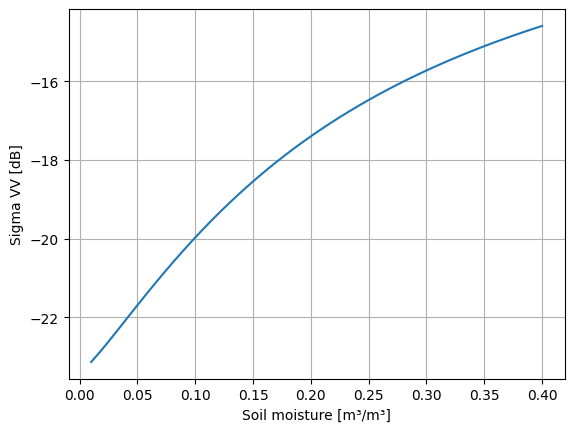

In [5]:
# Oh92 needs a dielectric constant of the soil, however soil moisture values 
# can be converted with the dobson model (input of clay and sand content) to 
# dielectric constant values

# Nessesary input parameters specific to Oh92 (other parameters are
# already defined under 4. Nessesary input parameters by all RT-models) 
sand = 0.051 # sand content of the soil
clay = 0.135 # clay content of the soil

# Convert soil moisture to dielectric constant
D = Dobson85(sand=sand, clay=clay,freq=f,mv=mv) # simplistic approach of Dobson95 model
eps = D.eps # dielectic constant values (complex; real and imaginary part)

# Run RT model Oh92
Oh92_model = Oh92(eps, ks, theta)

# Plot calculated backscatter
plt.plot(mv, db(Oh92_model.vv))
plt.xlabel('Soil moisture [m³/m³]')
plt.ylabel('Sigma VV [dB]')
plt.grid()


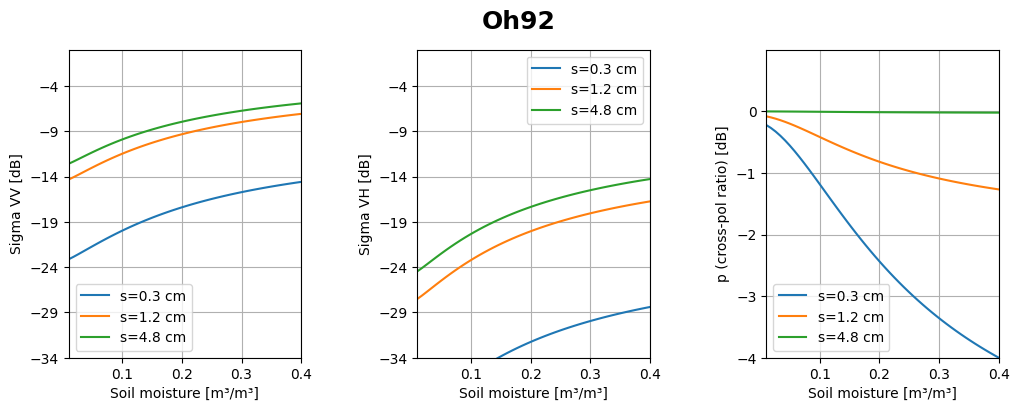

In [6]:
# Visualization of calculated backscatter for different surface roughness condition
#-----------------------------------------------------------------------------------
f = plt.figure(figsize=(12,4))
plt.suptitle('Oh92', fontsize=18, fontweight='bold')

ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

s_new = 0.3/100.
ks_new = k * s_new
Oh = Oh92(eps, ks_new, theta)
ax1.plot(mv, db(Oh.vv), label=['s=0.3 cm'])
ax2.plot(mv, db(Oh.hv), label=['s=0.3 cm'])
ax3.plot(mv, db(Oh.p), label=['s=0.3 cm'])
s_new = 1.2/100.
ks_new = k * s_new
Oh = Oh92(eps, ks_new, theta)
ax1.plot(mv, db(Oh.vv), label=['s=1.2 cm'])
ax2.plot(mv, db(Oh.hv), label=['s=1.2 cm'])
ax3.plot(mv, db(Oh.p), label=['s=1.2 cm'])
s_new = 4.8/100.
ks_new = k * s_new
Oh = Oh92(eps, ks_new, theta)
ax1.plot(mv, db(Oh.vv), label=['s=4.8 cm'])
ax2.plot(mv, db(Oh.hv), label=['s=4.8 cm'])
ax3.plot(mv, db(Oh.p), label=['s=4.8 cm'])

ax1.grid()
ax1.set_xlim(0.01,0.4)
ax1.set_ylim(-34.,-0.)
ax1.set_yticks(np.arange(-34, -0, 5))
ax2.grid()
ax2.set_xlim(0.01,0.4)
ax2.set_ylim(-34.,-0.)
ax2.set_yticks(np.arange(-34, -0, 5))
ax3.grid()
ax3.set_xlim(0.01,0.4)
ax3.set_ylim(-4.,1.)
ax3.set_yticks(np.arange(-4, 1, 1))

ax1.set_xlabel('Soil moisture [m³/m³]')
ax2.set_xlabel('Soil moisture [m³/m³]')
ax3.set_xlabel('Soil moisture [m³/m³]')

ax1.set_ylabel('Sigma VV [dB]')
ax2.set_ylabel('Sigma VH [dB]')
ax3.set_ylabel('p (cross-pol ratio) [dB]')


ax1.legend()
ax2.legend()
ax3.legend()

# Adjust spacing
plt.subplots_adjust(wspace=0.5)  # Adjust the width space


plt.show()


### 5.3 Oh04

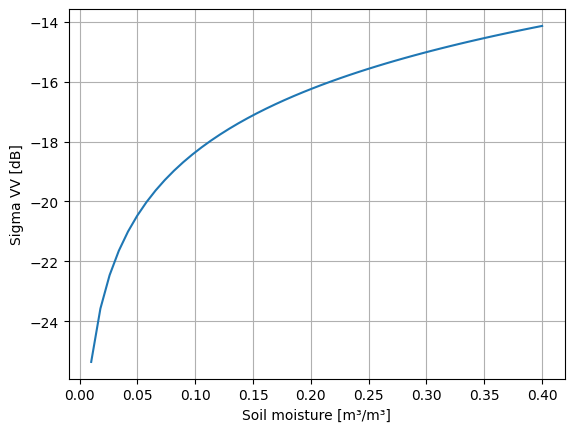

In [ ]:
# No additional input parameters except the ones under 
# 4. Nessesary input parameters by all RT-models needed 

# Run RT model Oh04
Oh04_model = Oh04(mv, ks, theta)

# Plot calculated backscatter
plt.plot(mv, db(Oh04_model.vv))
plt.xlabel('Soil moisture [m³/m³]')
plt.ylabel('Sigma VV [dB]')
plt.grid()

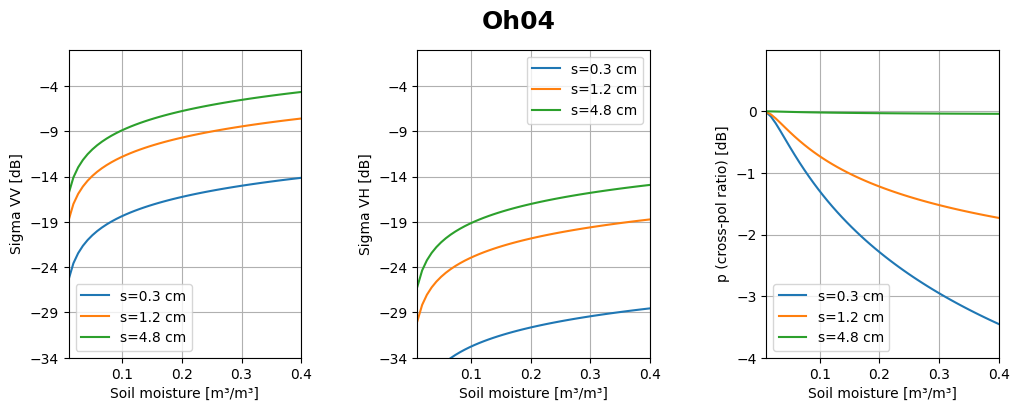

In [9]:
# Visualization of calculated backscatter for different surface roughness condition
#----------------------------------------------------------------------------------
f = plt.figure(figsize=(12,4))
plt.suptitle('Oh04', fontsize=18, fontweight='bold')

ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

s = 0.3/100.
ks = k * s
Oh = Oh04(mv, ks, theta)
ax1.plot(mv, db(Oh.vv), label=['s=0.3 cm'])
ax2.plot(mv, db(Oh.hv), label=['s=0.3 cm'])
ax3.plot(mv, db(Oh.p), label=['s=0.3 cm'])
s = 1.2/100.
ks = k * s
Oh = Oh04(mv, ks, theta)
ax1.plot(mv, db(Oh.vv), label=['s=1.2 cm'])
ax2.plot(mv, db(Oh.hv), label=['s=1.2 cm'])
ax3.plot(mv, db(Oh.p), label=['s=1.2 cm'])
s = 4.8/100.
ks = k * s
Oh = Oh04(mv, ks, theta)
ax1.plot(mv, db(Oh.vv), label=['s=4.8 cm'])
ax2.plot(mv, db(Oh.hv), label=['s=4.8 cm'])
ax3.plot(mv, db(Oh.p), label=['s=4.8 cm'])

ax1.grid()
ax1.set_xlim(0.01,0.4)
ax1.set_ylim(-34.,-0.)
ax1.set_yticks(np.arange(-34, -0, 5))
ax2.grid()
ax2.set_xlim(0.01,0.4)
ax2.set_ylim(-34.,-0.)
ax2.set_yticks(np.arange(-34, -0, 5))
ax3.grid()
ax3.set_xlim(0.01,0.4)
ax3.set_ylim(-4.,1.)
ax3.set_yticks(np.arange(-4, 1, 1))

ax1.set_xlabel('Soil moisture [m³/m³]')
ax2.set_xlabel('Soil moisture [m³/m³]')
ax3.set_xlabel('Soil moisture [m³/m³]')

ax1.set_ylabel('Sigma VV [dB]')
ax2.set_ylabel('Sigma VH [dB]')
ax3.set_ylabel('p (cross-pol ratio) [dB]')


ax1.legend()
ax2.legend()
ax3.legend()

# Adjust spacing
plt.subplots_adjust(wspace=0.5)  # Adjust the width space

plt.show()


### 5.4 Dubois95

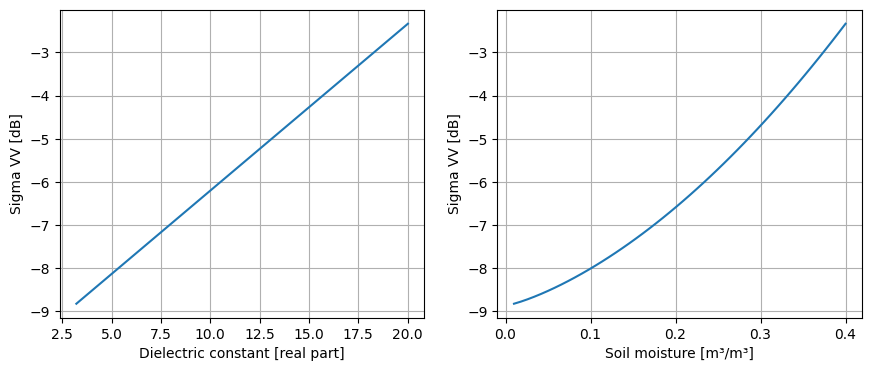

In [10]:
# Similar to 5.2 Oh92 the Dubois95 model need a dielectric constant of the soil.
# In 5.2. the conversion of soil moisture values to dielectric constant values
# wich the help of the Dobsen82 model (input of clay and sand content) was shown.
# Here we use an array dielectric constant values

import numpy as np

eps = np.array([
    3.21763781+2.37762482e-03j, 3.34171595+7.57155381e-03j,
    3.48304809+1.56444896e-02j, 3.63819338+2.65729742e-02j,
    3.80536125+4.03402087e-02j, 3.98346332+5.69330909e-02j,
    4.1717769 +7.63408799e-02j, 4.3697933 +9.85544764e-02j,
    4.57713927+1.23565989e-01j, 4.7935321 +1.51368453e-01j,
    5.01875222+1.81955635e-01j, 5.2526255 +2.15321898e-01j,
    5.49501145+2.51462093e-01j, 5.74579495+2.90371489e-01j,
    6.00488041+3.32045703e-01j, 6.27218751+3.76480658e-01j,
    6.54764798+4.23672541e-01j, 6.83120324+4.73617772e-01j,
    7.12280251+5.26312978e-01j, 7.42240141+5.81754968e-01j,
    7.72996081+6.39940719e-01j, 8.04544597+7.00867354e-01j,
    8.36882576+7.64532133e-01j, 8.70007213+8.30932438e-01j,
    9.03915962+9.00065765e-01j, 9.38606499+9.71929712e-01j,
    9.74076686+1.04652197e+00j, 10.10324549+1.12384033e+00j,
    10.47348251+1.20388265e+00j, 10.8514608 +1.28664686e+00j,
    11.23716428+1.37213099e+00j, 11.63057777+1.46033310e+00j,
    12.03168694+1.55125134e+00j, 12.44047816+1.64488390e+00j,
    12.85693843+1.74122903e+00j, 13.28105531+1.84028503e+00j,
    13.71281687+1.94205026e+00j, 14.15221162+2.04652311e+00j,
    14.59922849+2.15370203e+00j, 15.05385676+2.26358548e+00j,
    15.51608604+2.37617201e+00j, 15.98590625+2.49146015e+00j,
    16.46330756+2.60944851e+00j, 16.94828042+2.73013571e+00j,
    17.44081548+2.85352040e+00j, 17.94090362+2.97960129e+00j,
    18.4485359 +3.10837708e+00j, 18.96370357+3.23984653e+00j,
    19.48639804+3.37400840e+00j, 20.01661088+3.51086150e+00j
])

# To get just the real part as you requested:
eps_real = eps.real

# Run RT model Dubois95
Dubois95_model = Dubois95(eps=eps, ks=ks, theta=theta, lam=lam)

# Plot calculated backscatter
# As the previously defined eps values are the ones from the previously used
# Dobsen model and thus based on the previously defined soil moisture values
# both the dielectric constant and the soil moisture is plotted

f = plt.figure(figsize=(16,4))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)

ax1.plot(eps.real, db(Dubois95_model.vv))
ax1.set_xlabel('Dielectric constant [real part]')
ax1.set_ylabel('Sigma VV [dB]')
ax1.grid()

ax2.plot(mv, db(Dubois95_model.vv))
ax2.set_xlabel('Soil moisture [m³/m³]')
ax2.set_ylabel('Sigma VV [dB]')
ax2.grid()



### 5.5 I2EM

In [11]:
# Unfortunately using an np.array of dielectric constant/soil moisture is not
# yet supportet for I2EM. Here we show how the I2EM model changes with the
# incidence angle  

# Nessesary input parameters specific to Oh92 (other parameters are
# already defined under 4. Nessesary input parameters by all RT-models)
theta_deg = np.linspace(0.,70., 71)
theta = np.deg2rad(theta_deg) # incidence angle [radians]

eps = 11.3-1.5j # dielectric constant
l = 10./100. # correlation length [m]



eps = 11.3-1.5j # dielectric constant
f = 3. # frequency [GHz]

s = 1./100. # surface roughness [m]
l = 10./100. # correlation length [m]

In [12]:
hh1=[]
hh2=[]
vv1=[]
vv2=[]
hv1=[]
hv2=[]
xpol = True
auto=False
for t in theta:
    print(t)
    I1 = I2EM(f, eps, s, l, t, acf_type='gauss', xpol=xpol, auto=auto)
    I2 = I2EM(f, eps, s, l, t, acf_type='exp15', xpol=xpol, auto=auto)
    print(I1.ks, I1.kl)
    hh1.append(I1.hh)
    hh2.append(I2.hh)
    vv1.append(I1.vv)
    vv2.append(I2.vv)
    if xpol:
        hv1.append(I1.hv)
        hv2.append(I2.hv)

hh1 = np.array(hh1)
hh2 = np.array(hh2)
vv1 = np.array(vv1)
vv2 = np.array(vv2)
hv1 = np.array(hv1)
hv2 = np.array(hv2)

0.0


UnboundLocalError: cannot access local variable 'c11' where it is not associated with a value

In [ ]:
f = plt.figure()
ax = f.add_subplot(111)

# ax.plot(theta_deg, db(hh2), color='red', label='hh')
ax.plot(theta_deg, db(hh1), color='blue', label='hh')

# ax.plot(theta_deg, db(vv2), color='red', label='vv', linestyle='--')
ax.plot(theta_deg, db(vv1), color='blue', label='vv', linestyle='--')

# ax.plot(theta_deg, db(hv2), color='red', label='hv', linestyle='-.')
ax.plot(theta_deg, db(hv1), color='blue', label='hv', linestyle='-.')

ax.grid()
ax.set_xlim(0.,70.)
ax.set_ylim(-100.,15.)
ax.set_yticks(np.arange(-90, 20, 10))
plt.ylabel('Backscatter [dB]')
plt.xlabel('Incidence angle [°]')
plt.legend()
plt.show()